In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()


import tensorflow as tf
import h5py

import pandas as pd
import numpy as np

/Users/jiangxinyu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jiangxinyu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jiangxinyu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jiangxinyu/anaconda3/lib/python3.7/site-packages/tensorflow/

## data source
https://data.binance.vision/?prefix=data/spot/monthly/klines/

In [2]:
# import ethusd data
ethusd202101 = pd.read_csv('ethusd/ETHUSDT-1h-2021-01.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202102 = pd.read_csv('ethusd/ETHUSDT-1h-2021-02.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202103 = pd.read_csv('ethusd/ETHUSDT-1h-2021-03.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202104 = pd.read_csv('ethusd/ETHUSDT-1h-2021-04.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202105 = pd.read_csv('ethusd/ETHUSDT-1h-2021-05.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202106 = pd.read_csv('ethusd/ETHUSDT-1h-2021-06.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202107 = pd.read_csv('ethusd/ETHUSDT-1h-2021-07.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202108 = pd.read_csv('ethusd/ETHUSDT-1h-2021-08.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202109 = pd.read_csv('ethusd/ETHUSDT-1h-2021-09.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202110 = pd.read_csv('ethusd/ETHUSDT-1h-2021-10.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202111 = pd.read_csv('ethusd/ETHUSDT-1h-2021-11.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202112 = pd.read_csv('ethusd/ETHUSDT-1h-2021-12.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])

ethusd = pd.DataFrame()
frame = [ethusd202101, ethusd202102, ethusd202103, ethusd202104, ethusd202105, ethusd202106, ethusd202107, ethusd202108, ethusd202109, ethusd202110,ethusd202111,ethusd202112]
for df in frame:
    ethusd = ethusd.append(df, ignore_index= True)

print(ethusd.shape)



(8747, 12)


In [3]:
# xtzusd

xtzusd202101 = pd.read_csv('xtzusd/XTZUSDT-1h-2021-01.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202102 = pd.read_csv('xtzusd/XTZUSDT-1h-2021-02.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202103 = pd.read_csv('xtzusd/XTZUSDT-1h-2021-03.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202104 = pd.read_csv('xtzusd/XTZUSDT-1h-2021-04.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202105 = pd.read_csv('xtzusd/XTZUSDT-1h-2021-05.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202106 = pd.read_csv('xtzusd/XTZUSDT-1h-2021-06.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202107 = pd.read_csv('xtzusd/XTZUSDT-1h-2021-07.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202108 = pd.read_csv('xtzusd/XTZUSDT-1h-2021-08.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202109 = pd.read_csv('xtzusd/XTZUSDT-1h-2021-09.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202110 = pd.read_csv('xtzusd/XTZUSDT-1h-2021-10.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202111 = pd.read_csv('xtzusd/XTZUSDT-1h-2021-11.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202112 = pd.read_csv('xtzusd/XTZUSDT-1h-2021-12.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])


xtzusd = pd.DataFrame()
frame = [xtzusd202101, xtzusd202102, xtzusd202103, xtzusd202104, xtzusd202105, xtzusd202106, xtzusd202107, xtzusd202108, xtzusd202109, xtzusd202110, xtzusd202111, xtzusd202112]
for df in frame:
    xtzusd = xtzusd.append(df, ignore_index= True)

print(xtzusd.shape)

(8747, 12)


In [4]:
# ltcusd
ltcusd202101 = pd.read_csv('ltcusd/LTCUSDT-1h-2021-01.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202102 = pd.read_csv('ltcusd/LTCUSDT-1h-2021-02.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202103 = pd.read_csv('ltcusd/LTCUSDT-1h-2021-03.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202104 = pd.read_csv('ltcusd/LTCUSDT-1h-2021-04.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202105 = pd.read_csv('ltcusd/LTCUSDT-1h-2021-05.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202106 = pd.read_csv('ltcusd/LTCUSDT-1h-2021-06.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202107 = pd.read_csv('ltcusd/LTCUSDT-1h-2021-07.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202108 = pd.read_csv('ltcusd/LTCUSDT-1h-2021-08.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202109 = pd.read_csv('ltcusd/LTCUSDT-1h-2021-09.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202110 = pd.read_csv('ltcusd/LTCUSDT-1h-2021-10.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202111 = pd.read_csv('ltcusd/LTCUSDT-1h-2021-11.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202112 = pd.read_csv('ltcusd/LTCUSDT-1h-2021-12.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])

ltcusd = pd.DataFrame()
frame = [ltcusd202101, ltcusd202102, ltcusd202103, ltcusd202104, ltcusd202105, ltcusd202106, ltcusd202107, ltcusd202108, ltcusd202109, ltcusd202110, ltcusd202111, ltcusd202112]
for df in frame:
    ltcusd = ltcusd.append(df, ignore_index= True)

print(ltcusd.shape)

(8747, 12)


In [5]:
# avaxusd
avaxusd202101 = pd.read_csv('AVAXUSDT/AVAXUSDT-1h-2021-01.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
avaxusd202102 = pd.read_csv('AVAXUSDT/AVAXUSDT-1h-2021-02.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
avaxusd202103 = pd.read_csv('AVAXUSDT/AVAXUSDT-1h-2021-03.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
avaxusd202104 = pd.read_csv('AVAXUSDT/AVAXUSDT-1h-2021-04.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
avaxusd202105 = pd.read_csv('AVAXUSDT/AVAXUSDT-1h-2021-05.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
avaxusd202106 = pd.read_csv('AVAXUSDT/AVAXUSDT-1h-2021-06.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
avaxusd202107 = pd.read_csv('AVAXUSDT/AVAXUSDT-1h-2021-07.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
avaxusd202108 = pd.read_csv('AVAXUSDT/AVAXUSDT-1h-2021-08.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
avaxusd202109 = pd.read_csv('AVAXUSDT/AVAXUSDT-1h-2021-09.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
avaxusd202110 = pd.read_csv('AVAXUSDT/AVAXUSDT-1h-2021-10.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
avaxusd202111 = pd.read_csv('AVAXUSDT/AVAXUSDT-1h-2021-11.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
avaxusd202112 = pd.read_csv('AVAXUSDT/AVAXUSDT-1h-2021-12.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])

avaxusd = pd.DataFrame()
frame = [avaxusd202101, avaxusd202102, avaxusd202103, avaxusd202104, avaxusd202105, avaxusd202106, avaxusd202107, avaxusd202108, avaxusd202109, avaxusd202110, avaxusd202111, avaxusd202112]
for df in frame:
    avaxusd = avaxusd.append(df, ignore_index= True)

print(avaxusd.shape)


(8747, 12)


In [6]:
# btcusd
btcusd202101 = pd.read_csv('btcusd/BTCUSDT-1h-2021-01.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202102 = pd.read_csv('btcusd/BTCUSDT-1h-2021-02.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202103 = pd.read_csv('btcusd/BTCUSDT-1h-2021-03.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202104 = pd.read_csv('btcusd/BTCUSDT-1h-2021-04.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202105 = pd.read_csv('btcusd/BTCUSDT-1h-2021-05.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202106 = pd.read_csv('btcusd/BTCUSDT-1h-2021-06.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202107 = pd.read_csv('btcusd/BTCUSDT-1h-2021-07.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202108 = pd.read_csv('btcusd/BTCUSDT-1h-2021-08.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202109 = pd.read_csv('btcusd/BTCUSDT-1h-2021-09.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202110 = pd.read_csv('btcusd/BTCUSDT-1h-2021-10.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202111 = pd.read_csv('btcusd/BTCUSDT-1h-2021-11.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202112 = pd.read_csv('btcusd/BTCUSDT-1h-2021-12.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])

btcusd = pd.DataFrame()
frame = [btcusd202101, btcusd202102, btcusd202103, btcusd202104, btcusd202105, btcusd202106, btcusd202107, btcusd202108, btcusd202109, btcusd202110,btcusd202111, btcusd202112]
for df in frame:
    btcusd = btcusd.append(df, ignore_index= True)

print(btcusd.shape)

(8747, 12)


In [7]:
#preprocessing
#eth
ethusd_dropped = ethusd.drop(ethusd.columns[7:12], axis = 1)
#print(ethusd_dropped)
ethusd_close = ethusd_dropped["Close"]
#xtz
xtzusd_dropped = xtzusd.drop(xtzusd.columns[7:12], axis = 1)
#print(xtzusd_dropped)
xtzusd_close = xtzusd_dropped["Close"]

#ltc
ltcusd_dropped = ltcusd.drop(ltcusd.columns[7:12], axis = 1)

ltcusd_close = ltcusd_dropped["Close"]

# avax
avaxusd_dropped=avaxusd.drop(avaxusd.columns[7:12], axis = 1)

avaxusd_close = avaxusd_dropped["Close"]

#btc
btcusd_dropped = btcusd.drop(btcusd.columns[7:12], axis = 1)

btcusd_close = btcusd_dropped["Close"]

close_prices = pd.concat([btcusd_dropped["Close time"], ethusd_close, xtzusd_close, ltcusd_close,avaxusd_close, btcusd_close], axis = 1)
close_prices.columns.values[1] = "ETHUSD"
close_prices.columns.values[2] = "XTZUSD"
close_prices.columns.values[3] = "LTCUSD"
close_prices.columns.values[4] = "AVAXUSD"
close_prices.columns.values[5] = "BTCUSD"
#close_prices = close_prices.rename(columns = {"Close time":"close time", "Close" : "ETHUSD", "Close": "XTZUSD", "Close": "LTCUSD", "Close": "BTCUSD"})
print(close_prices)
#concat

         Close time   ETHUSD  XTZUSD  LTCUSD   AVAXUSD    BTCUSD
0     1609462799999   734.07  2.0038  123.87    3.2461  28995.13
1     1609466399999   748.28  2.0605  131.70    3.1709  29409.99
2     1609469999999   744.06  2.0828  133.33    3.0891  29194.65
3     1609473599999   744.82  2.0724  131.66    3.1085  29278.40
4     1609477199999   742.29  2.0358  130.87    3.0901  29220.31
...             ...      ...     ...     ...       ...       ...
8742  1640980799999  3626.27  4.2100  143.90  102.8100  45728.28
8743  1640984399999  3645.04  4.2000  144.10  106.9200  45879.24
8744  1640987999999  3688.41  4.2990  146.20  108.8700  46333.86
8745  1640991599999  3681.80  4.3170  146.10  111.5700  46303.99
8746  1640995199999  3676.23  4.3400  146.30  109.4300  46216.93

[8747 rows x 6 columns]


Text(0, 0.5, 'Average Correlation')

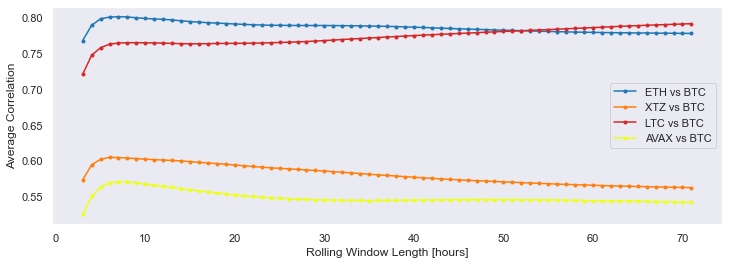

In [10]:
blue, orange, red ,yellow = '#1f77b4', '#ff7f0e', '#d62728', '#eeff1b'  
plt.figure(figsize=(12,4))
plt.grid()
avg_corr1, avg_corr2, avg_corr3, avg_corr4 = list(), list(), list(), list()
for win in range(3, 72): # hours
    avg_corr1.append(close_prices.ETHUSD.rolling(win).corr(close_prices.BTCUSD) \
                     .replace([np.inf, -np.inf], np.nan).dropna().mean())
    avg_corr2.append(close_prices.XTZUSD.rolling(win).corr(close_prices.BTCUSD) \
                     .replace([np.inf, -np.inf], np.nan).dropna().mean())
    avg_corr3.append(close_prices.LTCUSD.rolling(win).corr(close_prices.BTCUSD) \
                     .replace([np.inf, -np.inf], np.nan).dropna().mean())
    avg_corr4.append(close_prices.AVAXUSD.rolling(win).corr(close_prices.BTCUSD) \
                     .replace([np.inf, -np.inf], np.nan).dropna().mean())

    
plt.plot(range(3, 72), avg_corr1, '.-', color=blue, label='ETH vs BTC')
plt.plot(range(3, 72), avg_corr2, '.-', color=orange, label='XTZ vs BTC')
plt.plot(range(3, 72), avg_corr3, '.-', color=red, label='LTC vs BTC')
plt.plot(range(3, 72), avg_corr4, '.-', color=yellow, label='AVAX vs BTC')

 
plt.legend()
plt.xlabel('Rolling Window Length [hours]', fontsize=12)
plt.ylabel('Average Correlation', fontsize=12)